
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Deep Learning. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

__*GridSearch:*__ CodeGrade will likely break if it is asked to run a gridsearch for a deep learning model (CodeGrade instances run on a single processor). So while you may choose to run a gridsearch locally to find the optimum hyper-parameter values for your model, please delete (or comment out) the gridsearch code and simply instantiate a model with the optimum parameter values to get the performance that you want out of your model prior to submission. 


## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

____

# (CodeGrade) Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) If you have gridsearch code, now is when you either delete it or comment out that code so CodeGrade doesn't run it and crash. 

4) Read the directions in **Part 2** of this notebook for specific instructions on how to prep that section for CodeGrade.

____

<a id="p1"></a>
## Part 1 - LSTMs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric
- Report your overall score and accuracy
- Due to resource concerns on CodeGrade, `set your model's epochs=1`

For reference, the LSTM code we used in class will be useful. 

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done! 

In [1]:
# Import data (don't alter the code in this cell)
from tensorflow.keras.datasets import reuters

# Suppress some warnings from deprecated reuters.load_data
import warnings
warnings.filterwarnings('ignore')

# Load data
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# Due to limited computational resources on CodeGrade, take the following subsample 
train_size = 1000
X_train = X_train[:train_size]
y_train = y_train[:train_size]

In [2]:
# Demo of encoding
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
# Imports (don't alter this code)
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# DO NOT CHANGE THESE VALUES 
# Keras docs say that the + 1 is needed: https://keras.io/api/layers/core_layers/embedding/
MAX_FEATURES = len(word_index.values()) + 1

# maxlen is the length of each sequence (i.e. document length)
MAXLEN = 200

In [4]:
# Pre-process your data by creating sequences 
# Save your transformed data to the same variable name:
# example: X_train = some_transformation(X_train)

sequencer = lambda x: sequence.pad_sequences(x, maxlen=MAXLEN)

# YOUR CODE HERE
X_train = sequencer(X_train)
X_test = sequencer(X_test)


In [5]:
# Visible tests
assert X_train.shape[1] == MAXLEN, "Your train input sequences are the wrong length. Did you use the sequence import?"
assert X_test.shape[1] == MAXLEN, "Your test input sequences are the wrong length. Did you use the sequence import?"

### Create your model

Make sure to follow these instructions (also listed above):
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric

**Additional considerations**

The number of nodes in your output layer should be equal to the number of **unique** values in the sequences you are training and testing on. For this text, that value is equal to 46.

- Set the number of nodes in your output layer equal to 46

In [6]:
## Build and complie your model here

# YOUR CODE HERE
from tensorflow.keras.optimizers import Adam, Adamax, Adagrad, SGD
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Embedding(MAX_FEATURES, 64, input_length=MAXLEN))

model.add(LSTM(64))

model.add(Dense(46, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.01))


In [7]:
model.get_config()['layers']
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           1982720   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 46)                2990      
Total params: 2,018,734
Trainable params: 2,018,734
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Visible Test
assert model.get_config()["layers"][1]["class_name"] == "Embedding", "Layer 1 should be an Embedding layer."

In [9]:
# Hidden Test

### Fit your model

Now, fit the model that you built and compiled in the previous cells. Remember to set your `epochs=1`! 

In [10]:
# Fit your model here
# REMEMBER to set epochs=1

# YOUR CODE HERE
model.fit(X_train, y_train, epochs=1,
         validation_data=(X_test, y_test),
         )

32/32 [==============================] - 5s 105ms/step - loss: 2.9939 - accuracy: 0.2683 - val_loss: 2.4421 - val_accuracy: 0.2191


In [11]:
# Visible Test 
n_epochs = len(model.history.history["loss"])
assert n_epochs == 1, "Verify that you set epochs to 1."

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

The `pad_sequences` method takes a list of sequences(with length num_sequences)  and truncates or pads each of the sequences so that they're all the same length(maxlen) and returns a 2D numpy array with a shape of (num_sequences, maxlen).
This transformation is required because the model.fit() method requires either Numpy array(s) or TensorFlow tensor(s) or something that can be converted to one of those as training data/target values and a list of variable length sequences cannot be used.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

There are 2 primary motivations behind using LSTMs over traditional RNNs:
(1) Processing or learning from long input sequences
(2) Avoiding the vanishing gradient problem where it becomes difficult to adjust weights and learn as the gradient computed for back propagation through time becomes vanishingly small over time

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

LSTM RNNs are very useful at learning from and dealing with sequences as in
(1) Time series prediction
(2) Semantic processing of text
(2) Text generation

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

### Reading in the images

The code in the following cell will download the images to your notebook (either in your local Jupyter notebook or in Google colab).

In [12]:
# Prep to import images (don't alter the code in this cell)
import urllib.request

# Text file of image URLs
text_file = "https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_image_url.txt"
data = urllib.request.urlopen(text_file)

# Create list of image URLs
url_list = [] 
for line in data:
    url_list.append(line.decode('utf-8'))

In [13]:
# Import images (don't alter the code in this cell)

from skimage.io import imread
from skimage.transform import resize 

# instantiate list to hold images
image_list = []

### UNCOMMENT THE FOLLOWING CODE TO LOAD YOUR IMAGES

#loop through URLs and load each image
#for url in url_list:
#    image_list.append(imread(url))

## UNCOMMENT THE FOLLOWING CODE TO VIEW AN EXAMPLE IMAGE SIZE
#What is an "image"?
#print(type(image_list[0]), end="\n\n")

#print("Each of the Images is a Different Size")
#print(image_list[0].shape)
#print(image_list[1].shape)

<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


### Run ResNet50v2

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. You can print out or view the predictions in any way you see fit. In order to receive credit, you need to have made predictions at some point in the following cells.

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

**Autograded tasks**

* Instantiate your ResNet 50v2 and save to a variable named `resnet_model`

**Other tasks**
* Re-size your images
* Use `resnet_model` to predict if each image contains a frog
* Decode your predictions
* Hint: the lesson on CNNs will have some helpful code

**Stretch goals***
* Check for other things such as fish
* Print out the image with its predicted label
* Wrap everything nicely in well documented functions

## Important note!

To increase the chances that your notebook will run in CodeGrade, when you **submit** your notebook:

* comment out the code where you load the images
* comment out the code where you make the predictions
* comment out any plots or image displays you create

**MAKE SURE YOUR NOTEBOOK RUNS COMPLETELY BEFORE YOU SUBMIT!**

In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet_v2 import ResNet50V2 # <-- pre-trained model 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions

In [15]:
# Code from the CNN lecture might come in handy here! 

# YOUR CODE HERE

IMG_SIZE = (224, 224)
# We use tf.keras.preprocessing.image.smart_resize rather than 
# skimage.transform.resize because smart_resize maintains the
# aspect ratio of the original image.
# smart_resize returns an image array where color intensities are floats 
# with values ranging from 0-255
# If color intensity is a float matplotlib expects it to range from 0 to 1
# So scale the color intensities by 1/255 to get them into the range
# matplotlib expects.
# The other option is to use astype('uint8') to convert to integer.
# resnet appears to expect integer valued intensities so that's the 
# way we go.

#img_list = list(map(lambda x: image.smart_resize(x, IMG_SIZE).astype('uint8'), image_list))
#img_list = list(map(lambda x: image.smart_resize(x, IMG_SIZE)/255, image_list))


resnet_model = ResNet50V2(weights='imagenet')



In [16]:
# Visible test
assert resnet_model.get_config()["name"] == "resnet50v2", "Did you instantiate the resnet model?"

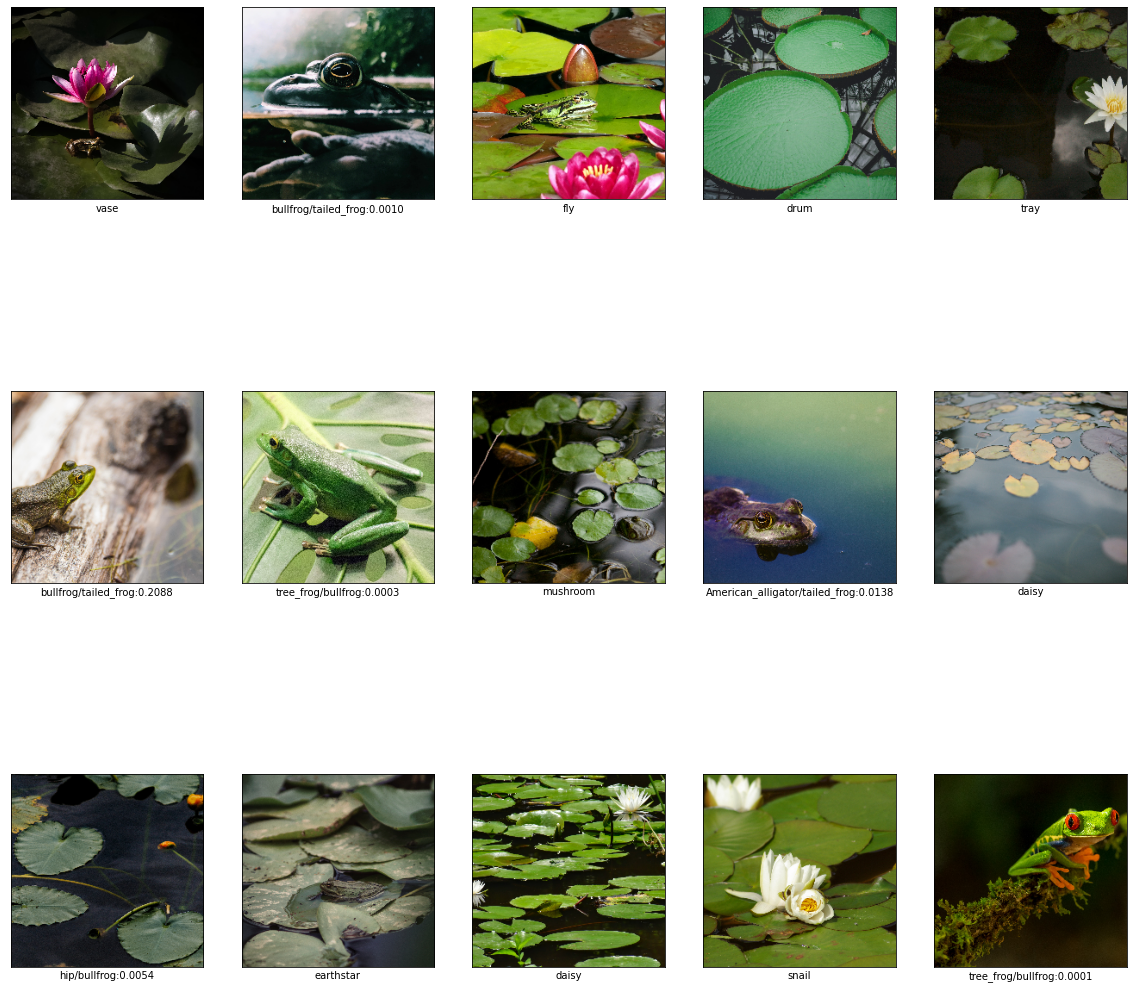

In [17]:
def label_and_display_images(img_list):
    def img_recognition_with_resnet(img):
      x = np.expand_dims(img, axis=0)
      x = preprocess_input(x)
      features = resnet_model.predict(x)
      results = decode_predictions(features, top=4)[0]
      #print(results)
      appendix = ''
      for result in results:
        if 'frog' in result[1]:
            appendix = f'/{result[1]}:{result[2]:0.4f}'
      return results[0][1]+appendix

    plt.figure(figsize=(20,20))
    for idx, img in enumerate(img_list):
        plt.subplot(3,5,idx+1)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(img_recognition_with_resnet(img))
        plt.grid(False)
        plt.imshow(img)
        
#label_and_display_images(img_list)

<a id="p3"></a>
## Part 3 - Autoencoders

**Describe a use case for an autoencoder given that an autoencoder tries to predict its own input.**

A major use case for an autoencoder would be dimensionality reduction, where the lower dimensionality of the output from the "bottleneck" layer would be used for more efficiently performing information retrieval tasks.

<a id="p4"></a>
## Part 4 - More...

**Answer the following questions, with a target audience of a fellow Data Scientist:**

- What do you consider your strongest area as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

* I don't have a good answer to the question about my "strongest area" in data science but i am fascinated by the breadth and power of Neural Networks.

* One area of data science that i would like to learn more about is Anomaly Detection because i think that capability is very applicable to building cognitive systems for managing large networks of devices with applications from network management to IoT.

* I think Data Science will be where embedded computing is now(computers in everything from refrigerators and washing machines to TVs and beyond) - i imagine embedded neural networks in every making them smarter and more responsive.


## Congratulations! 

Thank you for your hard work, and [congratulations](https://giphy.com/embed/26xivLqkv86uJzqWk)!!! You've learned a lot, and you should proudly call yourself a Data Scientist.
